https://csr.lanl.gov/data/2017.html


https://csr.lanl.gov/data-fence/1571548765/1fcFh-bNWqPJuUSQe72Z9N_Nw28=/unified-host-network-dataset-2017/netflow.html

Compressed, netflow_day-02.bz2 is 1100MB

Extracts to 6.7GB; that's 115,949,436 lines

In [1]:
import pandas
print('pandas',pandas.__version__)
import networkx
print('networkx',networkx.__version__)
from networkx import nx
from matplotlib import pyplot as plt
import time
import pickle

pandas 0.24.2
networkx 2.3


# Load data

* Time: The start time of the event in epoch time format
* Duration: The duration of the event in seconds.
* SrcDevice: The device that likely initiated the event.
* DstDevice: The receiving device.
* Protocol: The protocol number.
* SrcPort: The port used by the SrcDevice.
* DstPort: The port used by the DstDevice.
* SrcPackets: The number of packets the SrcDevice sent during the event.
* DstPackets: The number of packets the DstDevice sent during the event.
* SrcBytes: The number of bytes the SrcDevice sent during the event.
* DstBytes: The number of bytes the DstDevice sent during the event.

nfdf.to_pickle("netflow_day_02_1E6rows.pkl")

In [2]:
start_time = time.time()
nfdf = pandas.read_pickle('netflow_day_02_1E6rows.pkl')
print('elapsed',round(time.time()-start_time,2),'seconds')

elapsed 0.26 seconds


# Exploration, Characterization

In [3]:
nfdf.shape

(1000000, 11)

In [4]:
nfdf.head()

,Time,Duration,SrcDevice,DstDevice,Protocol,SrcPort,DstPort,SrcPackets,DstPackets,SrcBytes,DstBytes
0,118781,5580,Comp364445,Comp547245,17,Port05507,Port46272,0,755065,0,1042329018
1,118783,6976,Comp450942,Comp829338,6,Port03137,445,1665,1108,300810,250408
2,118785,14178,IP564116,Comp141988,17,5060,5060,1866,0,1477041,0
3,118785,28147,IP564116,Comp141988,17,5060,5060,3326,0,2656305,0
4,118785,48507,IP564116,Comp141988,17,5060,5060,5423,0,4388449,0


In [5]:
nfdf.shape

(1000000, 11)

# visualize using Networkx

Here I provide code to visualize a graph

https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html#networkx.convert_matrix.from_pandas_edgelist

In [6]:
try:
    G.clear()
except NameError:
    pass

The following line allows you to select the number of rows used in the graph

In [14]:

G = nx.from_pandas_edgelist(nfdf[0:20],'SrcDevice','DstDevice','Duration')

In [15]:
G.number_of_nodes()

6

### no labels

/Users/tugcerenler/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


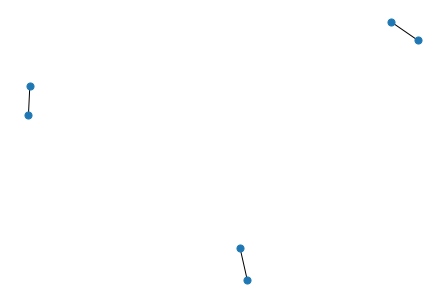

In [9]:
nx.draw(G, with_labels = False, node_size = 50)
plt.show()

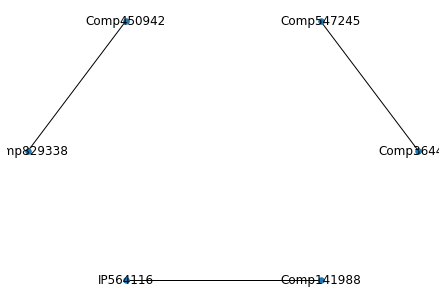

In [10]:
nx.draw(G, with_labels=True,node_size=30,pos = nx.shell_layout(G))
plt.show()

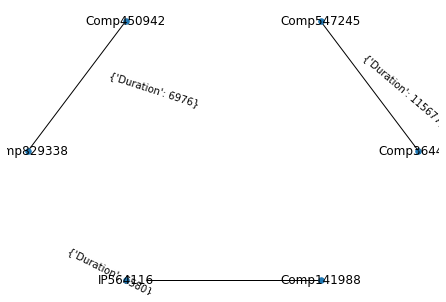

In [11]:
pos = nx.spring_layout(G)
nx.draw_circular(G,with_labels=True,node_size=30)
nx.draw_networkx_edge_labels(G,pos=pos,with_labels=True)
_=plt.axis('off') 

# TASK: what number of nodes makes the visualization unreadable?

You have a dataframe with 1,000,000 rows. 

First, design your experiments. What number of rows will you explore to address the question? 

At what point does node and/or edge labeling provide value?

In [12]:
G.nodes(data=True)

NodeDataView({'Comp364445': {}, 'Comp547245': {}, 'Comp450942': {}, 'Comp829338': {}, 'IP564116': {}, 'Comp141988': {}})

In [13]:
nx.degree(G)

DegreeView({'Comp364445': 1, 'Comp547245': 1, 'Comp450942': 1, 'Comp829338': 1, 'IP564116': 1, 'Comp141988': 1})

I tried to address different number of rows( 5,30,50,100,500,5000 etc.). the number of nodes were 6 up to 20 rows, 13 up to 50, 42 up to 100 which was really unreadable. I tried different graph types ( shell,random,spectral,spring etc.) I think best number of nodes were 6.